# Capital Asset Pricing Model (CAPM) Example

In [186]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas.io.data as web
import Quandl
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import patsy
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [187]:
# use quandl to pull apple and yahoo data for the last ten years
twitter_all = Quandl.get("YAHOO/TWTR", trim_start = "2013-11-7")
nasdaq_all = Quandl.get("NASDAQOMX/COMP", trim_start = '2013-11-7')

In [188]:
# plot apple's share price (adjusted close) over the last decade 
twitter_all.ix[0:4]

,Open,High,Low,Close,Volume,Adjusted Close
Date,,,,,,
2013-11-07,45.099998,50.090000,44.000000,44.900002,117701600,44.900002
2013-11-08,45.930000,46.939999,40.689999,41.650002,27925300,41.650002
2013-11-11,40.500000,43.000000,39.400002,42.900002,16113900,42.900002
2013-11-12,43.660000,43.779999,41.830002,41.900002,6316700,41.900002


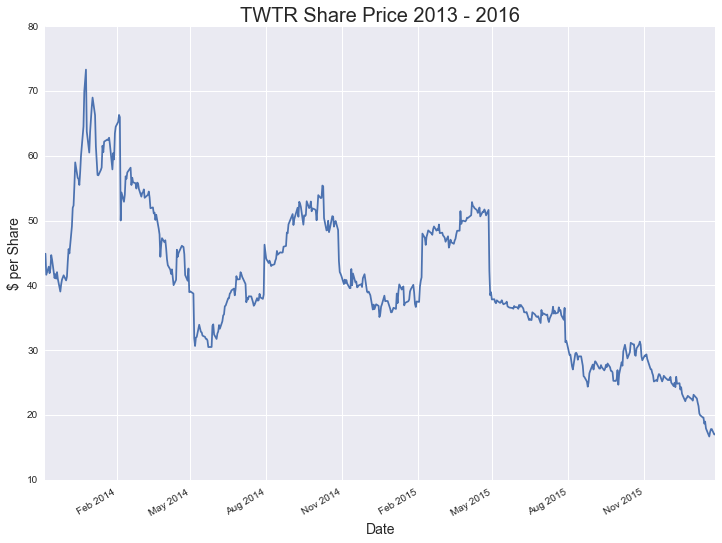

In [189]:
plt.figure(figsize=(12,9))
aapl_all['Adjusted Close'].plot()
plt.title('TWTR Share Price 2013 - 2016', fontsize = 20)
plt.ylabel('$ per Share', fontsize = 14)
plt.xlabel('Date',fontsize=14)

In [190]:
# plot the nasdaq's performance over the same period
nasdaq_all.head()
# we'll use the index value for this

,Index Value,High,Low,Total Market Value,Dividend Market Value
Trade Date,,,,,
2013-11-07,3857.33,3938.33,3855.07,5.801185e+12,298930363
2013-11-08,3919.23,3919.23,3869.12,5.894534e+12,36250491
2013-11-11,3919.79,3925.34,3904.72,5.896218e+12,0
2013-11-12,3919.92,3922.27,3902.67,5.896738e+12,756790977
2013-11-13,3965.58,3965.58,3899.31,5.961828e+12,431814212


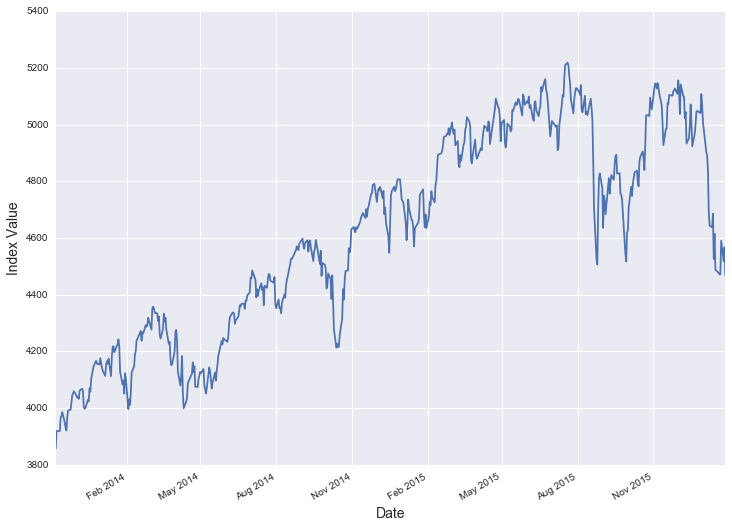

In [191]:
plt.figure(figsize=(12,9))
nasdaq_all['Index Value'].plot()
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Index Value', fontsize = 14)

In [192]:
# next we'll use the log returns 
twitter_returns = pd.DataFrame(log(twitter_all['Adjusted Close'] / twitter_all['Adjusted Close'].shift(1)))
twitter_returns.dropna(inplace = True)
nasdaq_returns = pd.DataFrame(log(nasdaq_all['Index Value'] / nasdaq_all['Index Value'].shift(1)))
nasdaq_returns.dropna(inplace = True)

In [193]:
print 'TWTR Returns:'
print twitter_returns.head()
print ''
print 'NASDAQ Returns'
print nasdaq_returns.head()

TWTR Returns:
            Adjusted Close
Date                      
2013-11-08       -0.075136
2013-11-11        0.029570
2013-11-12       -0.023586
2013-11-13        0.016568
2013-11-14        0.047896

NASDAQ Returns
            Index Value
Trade Date             
2013-11-08     0.015920
2013-11-11     0.000143
2013-11-12     0.000033
2013-11-13     0.011581
2013-11-14     0.001804


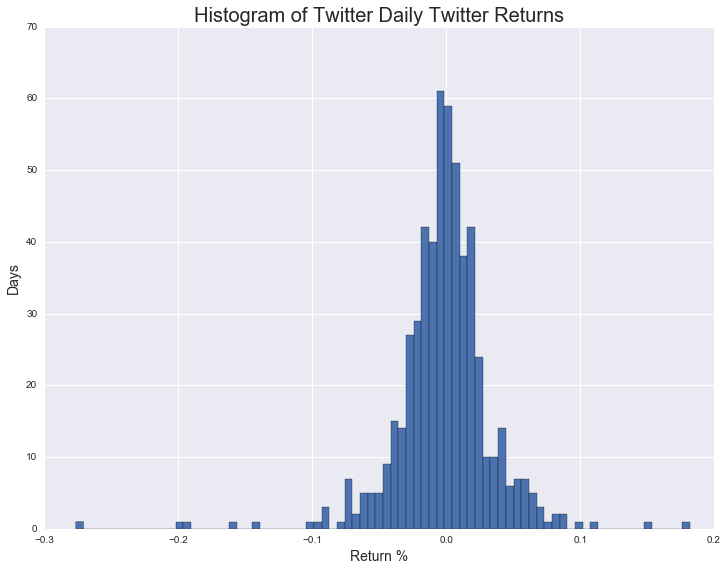

In [194]:
plt.figure(figsize = (12,9))
plt.hist(twitter_returns['Adjusted Close'], bins = 80)
plt.title('Histogram of Twitter Daily Twitter Returns', fontsize = 20)
plt.xlabel('Return %', fontsize = 14)
plt.ylabel('Days', fontsize = 14)

#### Twitter looks normally distributed with a bit of left skew (negative returns), which makes sense when we look at the history of its stock price

(0, 60)

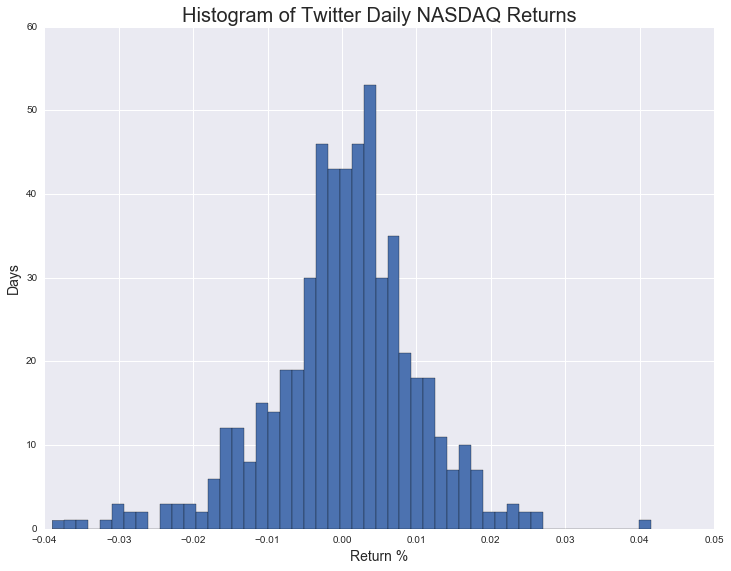

In [195]:
# and we'll do the same thing for nasdaq
plt.figure(figsize = (12,9))
plt.hist(nasdaq_returns['Index Value'], bins = 50)
plt.title('Histogram of Twitter Daily NASDAQ Returns', fontsize = 20)
plt.xlabel('Return %', fontsize = 14)
plt.ylabel('Days', fontsize = 14)
plt.ylim(0,60)

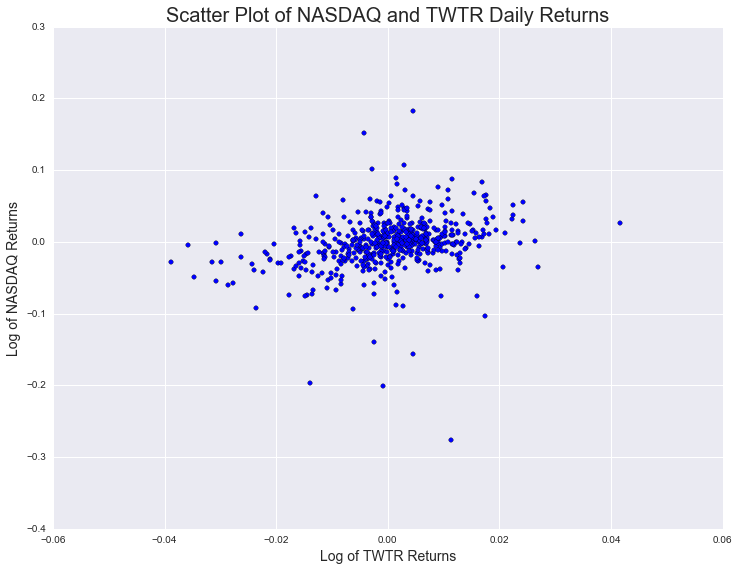

In [196]:
# next plot a scatter plot of twitter against the nasdaq
plt.figure(figsize = (12,9))
plt.scatter(nasdaq_returns, twitter_returns)
plt.ylabel('Log of NASDAQ Returns', fontsize = 14)
plt.xlabel('Log of TWTR Returns', fontsize = 14)
plt.title('Scatter Plot of NASDAQ and TWTR Daily Returns', fontsize = 20)

In [197]:
# merge nasdaq and twitter dataframes to run regression
data = pd.merge(twitter_returns, nasdaq_returns, left_index = True, right_index = True)
# then rename the columns so we remember which value belongs to which
data.rename(columns = {'Adjusted Close': 'Twitter', 'Index Value': 'NASDAQ'}, inplace = True)
data.head()

,Twitter,NASDAQ
Date,,
2013-11-08,-0.075136,0.015920
2013-11-11,0.029570,0.000143
2013-11-12,-0.023586,0.000033
2013-11-13,0.016568,0.011581
2013-11-14,0.047896,0.001804


In [198]:
# run ordinary least squares on the two. twtr will be the dependent variable

mod = smf.ols(formula = 'Twitter ~ NASDAQ', data = data).fit()
print mod.summary()

                            OLS Regression Results                            
Dep. Variable:                Twitter   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     51.54
Date:                Thu, 28 Jan 2016   Prob (F-statistic):           2.26e-12
Time:                        12:36:31   Log-Likelihood:                 1081.6
No. Observations:                 557   AIC:                            -2159.
Df Residuals:                     555   BIC:                            -2151.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.0020      0.001     -1.389      0.1

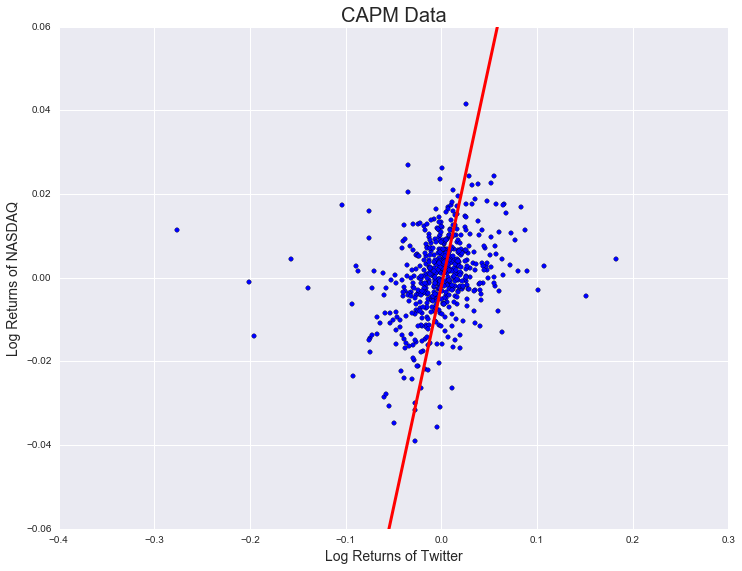

In [199]:
# plot best fit line through the data
figure, ax = plt.subplots(figsize=(12,9))
ax.scatter(twitter_returns,nasdaq_returns)
abline_plot(model_results = mod, ax = ax, color = 'red', linewidth = 3)

ax.set_title('CAPM Data', fontsize = 20)
ax.set_ylabel('Log Returns of NASDAQ', fontsize = 14)
ax.set_xlabel('Log Returns of Twitter', fontsize = 14)

In [200]:
print mod.f_test("NASDAQ = 1")

<F test: F=array([[ 0.15919695]]), p=0.690050414474, df_denom=555, df_num=1>


In [201]:
print mod.f_test("Intercept = 0")

<F test: F=array([[ 1.92847225]]), p=0.165482719003, df_denom=555, df_num=1>


In [202]:
print mod.f_test("NASDAQ = 1, Intercept = 0")

<F test: F=array([[ 1.02991844]]), p=0.357717422643, df_denom=555, df_num=2>
